# Задание 4

## Выделить и посчитать номера машин

## Бонусные баллы за их распознавание (при условии решения всех задач из проекта)

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

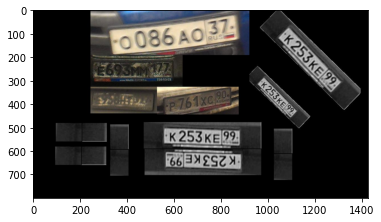

In [2]:
carplate_img = cv2.imread('4.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(carplate_img_rgb)

# 1. Распознавание номеров

In [3]:
carplate_haar_cascade =  cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

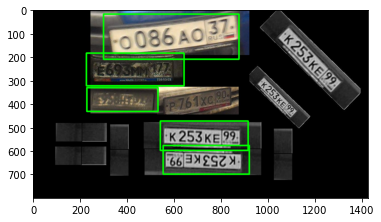

In [4]:
def carplate_detect(image):
    carplate_overlay = image.copy() 
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay, scaleFactor=1.1, minNeighbors=3)
  
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (0,255,0), 5) 
      
    return carplate_overlay
  
detected_carplate_img = carplate_detect(carplate_img_rgb)
plt.imshow(detected_carplate_img)  

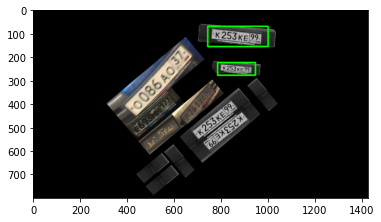

In [10]:
height, width, channel = carplate_img_rgb.shape
matrix1 = cv2.getRotationMatrix2D((width, height), 40, 0.65)
carplate_rotated_rgb1 = cv2.warpAffine(carplate_img_rgb, matrix1, (width, height))

carplate_rotated_rgb1 = carplate_detect(carplate_rotated_rgb1)

plt.imshow(carplate_rotated_rgb1)  
io.imsave('right_corner.png', carplate_rotated_rgb1)

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def transformCircle(r):
    matrix2 = cv2.getRotationMatrix2D((width, height), r, 1.10)
    carplate_rotated_rgb3 = cv2.warpAffine(carplate_img_with_det, matrix2, (width, height))


    carplate_rotated_rgb3 = carplate_detect(carplate_rotated_rgb3)
    
    plt.figure(figsize=(20,20))
    plt.imshow(carplate_rotated_rgb3)  
interact(transformCircle, r=(-65, -35))


interactive(children=(IntSlider(value=-50, description='r', max=-35, min=-65), Output()), _dom_classes=('widge…

<function __main__.transformCircle(r)>

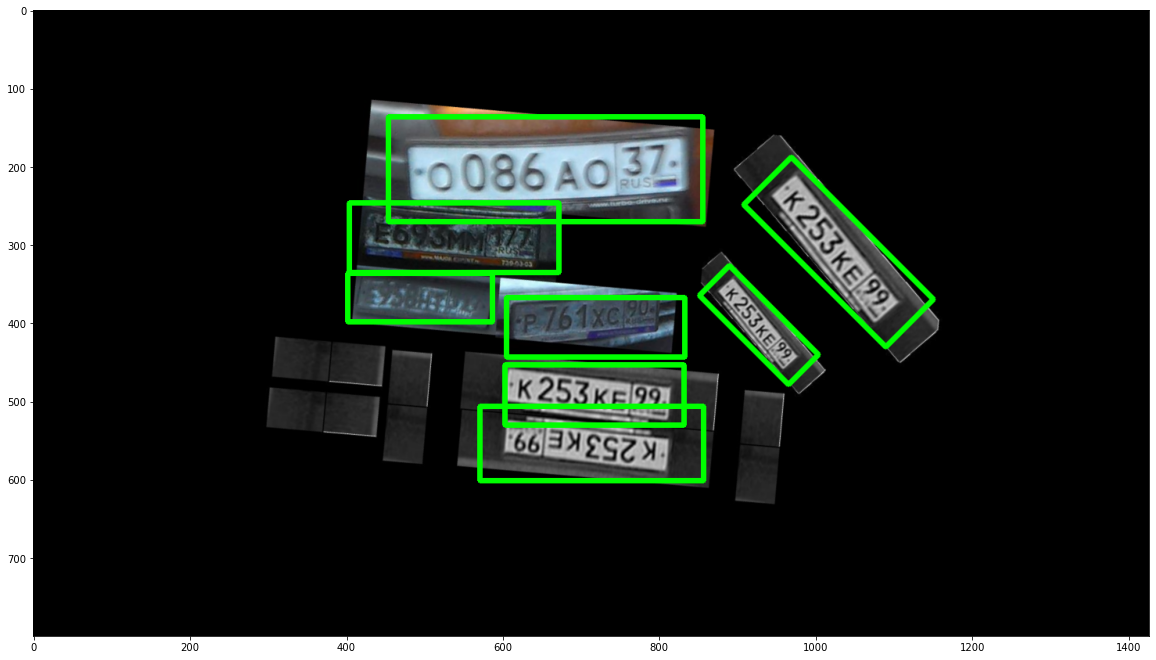

In [7]:
carplate_img_with_det = cv2.imread('right_corner.png')

matrix2 = cv2.getRotationMatrix2D((width, height), -45, 1.0)
carplate_rotated_rgb2 = cv2.warpAffine(carplate_img_with_det, matrix2, (width, height))


carplate_rotated_rgb2 = carplate_detect(carplate_rotated_rgb2)

plt.figure(figsize=(20,20))
plt.imshow(carplate_rotated_rgb2)  
io.imsave('final.png', carplate_rotated_rgb2)

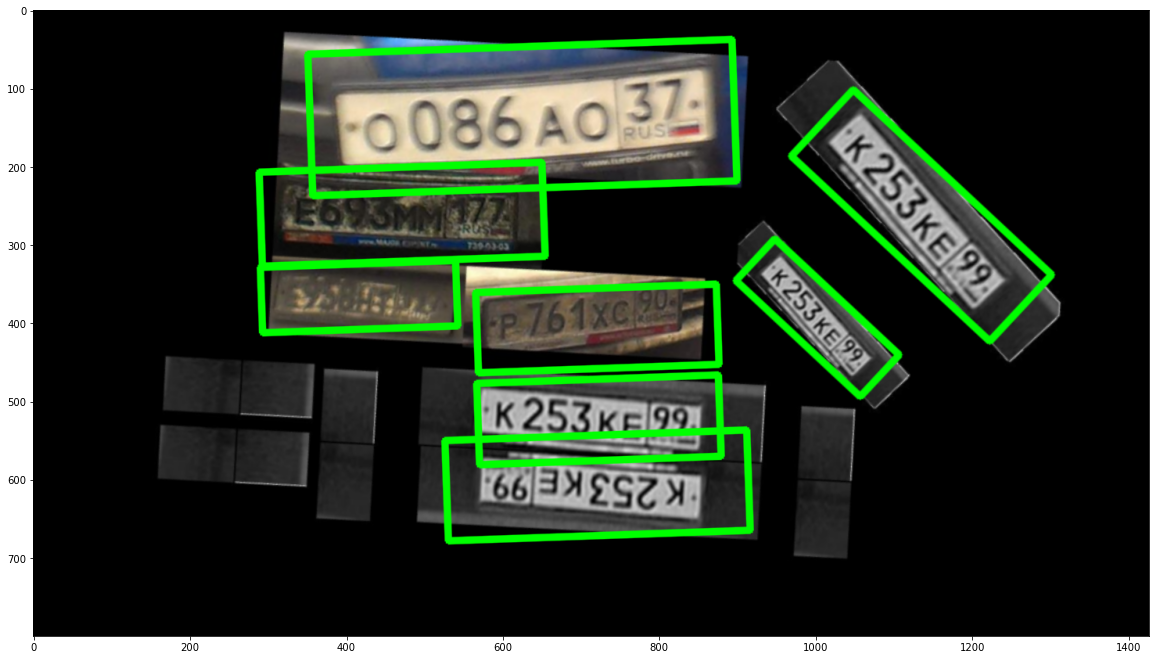

In [12]:
final_result = cv2.imread('final.png')

matrix3 = cv2.getRotationMatrix2D((width, height), 2, 1.35)
final_rotated = cv2.warpAffine(final_result, matrix3, (width, height))

plt.figure(figsize=(20,20))
plt.imshow(final_rotated) 

# 2. Считывание текста с распознанных номеров при помощи пакета tesseract

In [5]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files(86)\Tesseract-OCR\tesseract.exe'

In [115]:
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=10)
    for x,y,w,h in carplate_rects: 
            carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
            
    return carplate_img

# Первый сверху

0086A037



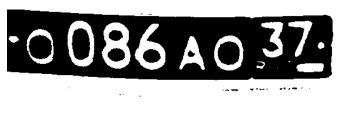

In [13]:
matrix3 = cv2.getRotationMatrix2D((width, height), -3, 1.6)
plate_rotated = cv2.warpAffine(final_result, matrix3, (width, height))
#plt.imshow(carplate_extract_img);

carplate_extract_img_2 = carplate_extract(plate_rotated)

carplate_extract_img_gray_2 = cv2.cvtColor(carplate_extract_img_2, cv2.COLOR_RGB2GRAY)
_, carplate_extract_bin_2 = cv2.threshold(carplate_extract_img_gray_2, 160, 255, cv2.THRESH_BINARY_INV)
plt.axis('off') 
plt.imshow(carplate_extract_bin_2, cmap = 'gray');

print(pytesseract.image_to_string(carplate_extract_bin_2, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

# Второй сверху

E693MM177



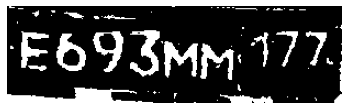

In [85]:
matrix3 = cv2.getRotationMatrix2D((width, height), 2, 1.41)
plate_rotated = cv2.warpAffine(final_result, matrix3, (width, height))
#plt.imshow(carplate_extract_img);

carplate_extract_img_2 = carplate_extract(plate_rotated)

carplate_extract_img_gray_2 = cv2.cvtColor(carplate_extract_img_2, cv2.COLOR_RGB2GRAY)
_, carplate_extract_bin_2 = cv2.threshold(carplate_extract_img_gray_2, 36, 255, cv2.THRESH_BINARY_INV)
plt.axis('off') 
plt.imshow(carplate_extract_bin_2, cmap = 'gray');

print(pytesseract.image_to_string(carplate_extract_bin_2, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

# Второй снизу

K253KE99



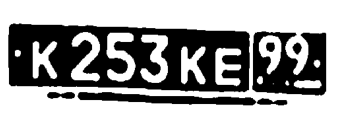

In [20]:
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
#plt.imshow(carplate_extract_img);

carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
_, carplate_extract_bin = cv2.threshold(carplate_extract_img_gray, 123, 255, cv2.THRESH_BINARY_INV)
plt.axis('off') 
plt.imshow(carplate_extract_bin, cmap = 'gray');

print(pytesseract.image_to_string(carplate_extract_bin, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

# Первый снизу

K253KE99



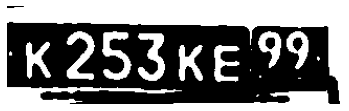

In [177]:
matrix3 = cv2.getRotationMatrix2D((width, height), 186, 1.5)
plate_rotated = cv2.warpAffine(final_result, matrix3, (width, height))
#plt.imshow(carplate_extract_img);

carplate_extract_img_2 = carplate_extract(plate_rotated)

carplate_extract_img_gray_2 = cv2.cvtColor(carplate_extract_img_2, cv2.COLOR_RGB2GRAY)
_, carplate_extract_bin_2 = cv2.threshold(carplate_extract_img_gray_2, 100, 255, cv2.THRESH_BINARY_INV)
plt.axis('off') 
plt.imshow(carplate_extract_bin_2, cmap = 'gray');

print(pytesseract.image_to_string(carplate_extract_bin_2, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

In [117]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def transformCircle(r, z, y):
    matrix3 = cv2.getRotationMatrix2D((width, height), r, y)
    plate_rotated = cv2.warpAffine(final_result, matrix3, (width, height))
    #plt.imshow(carplate_extract_img);

    carplate_extract_img_2 = carplate_extract(plate_rotated)

    carplate_extract_img_gray_2 = cv2.cvtColor(carplate_extract_img_2, cv2.COLOR_RGB2GRAY)
    _, carplate_extract_bin_2 = cv2.threshold(carplate_extract_img_gray_2, z, 255, cv2.THRESH_BINARY_INV)
    plt.axis('off') 
    plt.imshow(carplate_extract_bin_2, cmap = 'gray');
    print(pytesseract.image_to_string(carplate_extract_bin_2, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))
    
interact(transformCircle, r=(5, 40), z = (0, 180), y = (1.0, 1.7, 0.01))

interactive(children=(IntSlider(value=22, description='r', max=40, min=5), IntSlider(value=90, description='z'…

<function __main__.transformCircle(r, z, y)>